# Preprocessing - Notebook 3
## Enhancing dataset

- Enhance image quality by applying noise reduction/contrast enhancement
- Resizing images with padding so all images are fixed size (for CNN)



In [7]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from pathlib import Path
from tqdm import tqdm
import random

In [8]:
# Seting matplotlib style
plt.style.use('ggplot')

# Paths
projectRoot = Path().resolve().parent
datasetPath = projectRoot / "CV2024_CW_Dataset"

trainImagePath = datasetPath / "train" / "images"
trainLabelPath = datasetPath / "train" / "labels"
testImagePath = datasetPath / "test" / "images"
testLabelPath = datasetPath / "test" / "labels"

trainImages = sorted(os.listdir(trainImagePath))
testImages = sorted(os.listdir(testImagePath))

print("Dataset paths set up correctly.")

Dataset paths set up correctly.


In [9]:
def displayEnhancement(imageFolder, enhancementFunction, numSamples=3, functionName="Enhancement"):

    # Get all images in the folder and select random ones
    imageFiles = [f for f in os.listdir(imageFolder) if f.endswith(".jpeg")]
    randomImages = random.sample(imageFiles, numSamples)

    # Set up figure
    fig, axes = plt.subplots(numSamples, 2, figsize=(8, numSamples * 3))

    for i, imgFile in enumerate(randomImages):
        # Load the original image
        imgPath = os.path.join(imageFolder, imgFile)
        img = cv2.imread(imgPath)
        imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert for display

        # Apply the enhancement function
        enhancedImg = enhancementFunction(img)
        enhancedImgRGB = cv2.cvtColor(enhancedImg, cv2.COLOR_BGR2RGB)

        # Plot Original
        axes[i, 0].imshow(imgRGB)
        axes[i, 0].axis("off")
        axes[i, 0].set_title("Original Image")

        # Plot Enhanced
        axes[i, 1].imshow(enhancedImgRGB)
        axes[i, 1].axis("off")
        axes[i, 1].set_title(f"{functionName}")

    plt.tight_layout()
    plt.show()

## Gaussian Blur (Noise Reduction)
Blurs the image to remove noise while preserving edges.


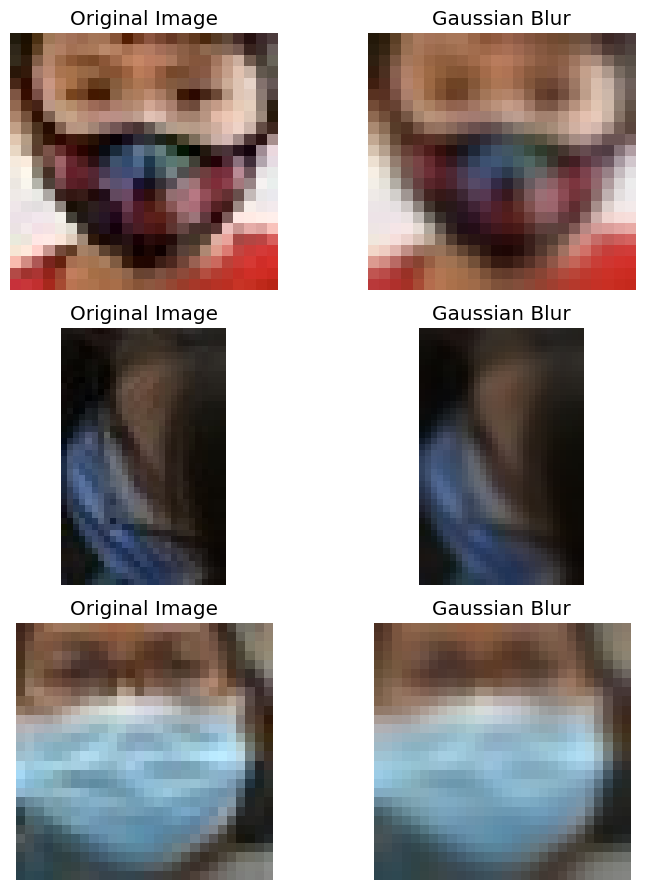

In [18]:
def applyGaussianBlur(img):

    return cv2.GaussianBlur(img, (3, 3), 0)


displayEnhancement(trainImagePath, applyGaussianBlur, numSamples=3, functionName="Gaussian Blur")


## Histogram Equalization (Contrast Enhancement)
Enhances image contrast by adjusting the brightness level


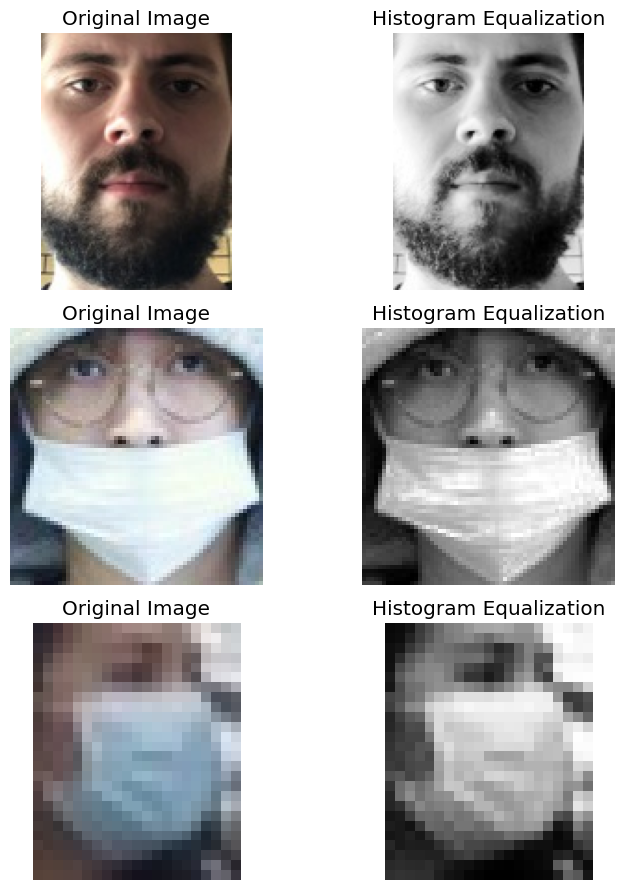

In [19]:
def applyHistogramEqualization(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # convert to grayscale
    equalized = cv2.equalizeHist(gray)  # apply histogram equalization
    return cv2.merge([equalized, equalized, equalized])  # converting back to 3 channel grayscale

displayEnhancement(trainImagePath, applyHistogramEqualization, numSamples=3, functionName="Histogram Equalization")


## Adaptive Histogram Equalization (CLAHE)
Applying localized contrast improvement to prevent image from becoming too bright


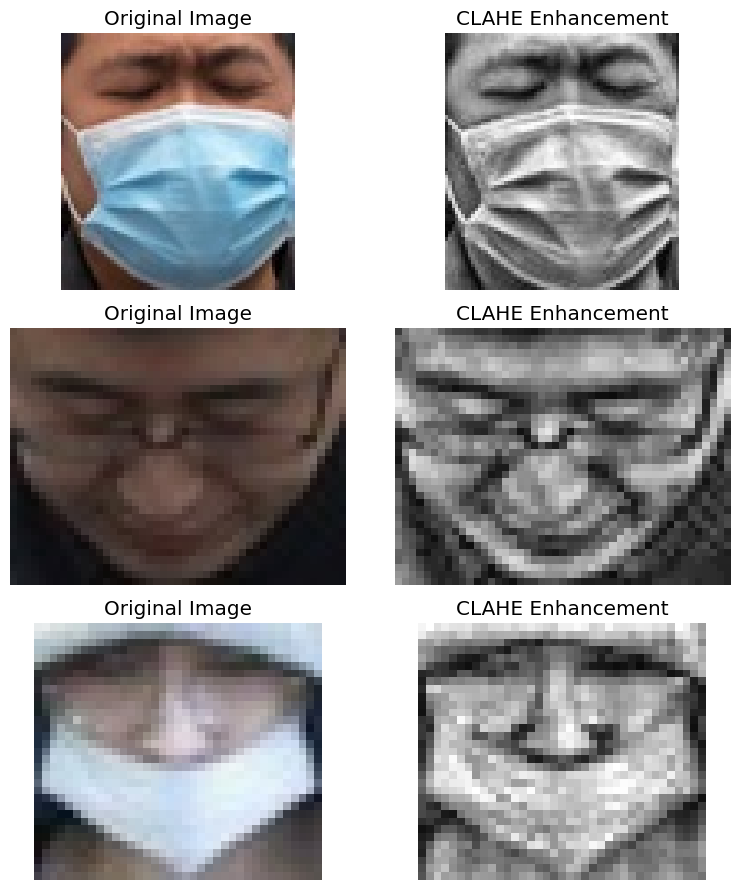

In [21]:
def applyCLAHE(img):

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    equalized = clahe.apply(gray)
    return cv2.merge([equalized, equalized, equalized])  #convert back to 3 channel


displayEnhancement(trainImagePath, applyCLAHE, numSamples=3, functionName="CLAHE Enhancement")


## Sharpening Filter
Enhances edges to make details more clear


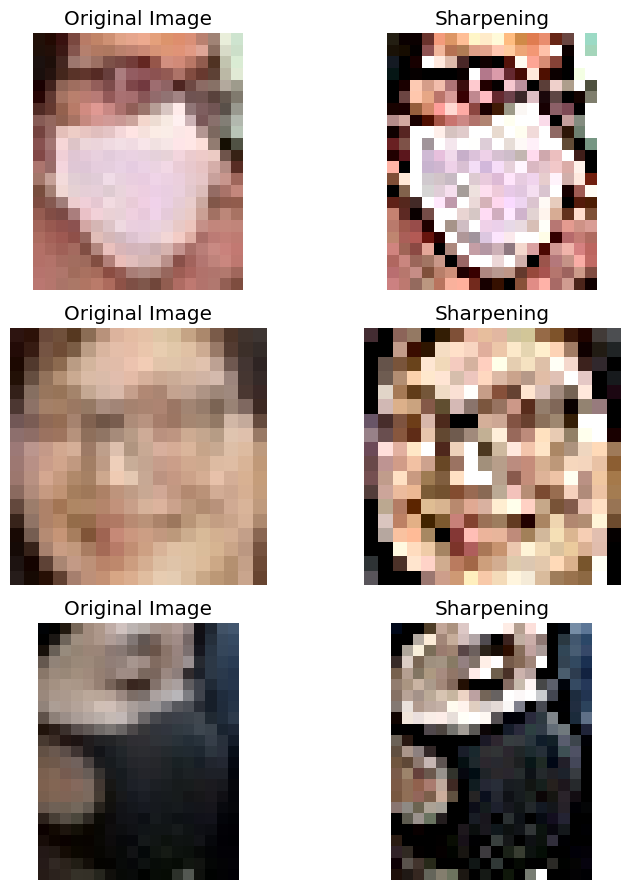

In [22]:
def applySharpening(img):

    sharpeningKernel = np.array([[0, -1, 0], 
                                 [-1, 5, -1], 
                                 [0, -1, 0]])
    return cv2.filter2D(img, -1, sharpeningKernel)

displayEnhancement(trainImagePath, applySharpening, numSamples=3, functionName="Sharpening")


## Edge Detection (Canny)
Detectecting strong edges in the image for future feature extraction


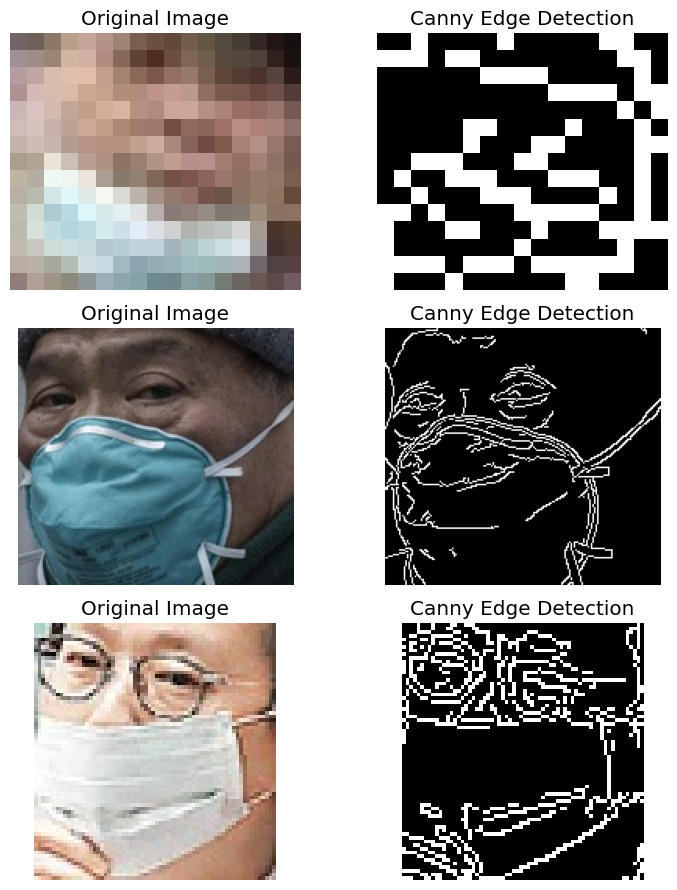

In [23]:
def applyCannyEdgeDetection(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 100, 200)  # apply Canny Edge 
    return cv2.merge([edges, edges, edges])  #convert back to 3 channel

displayEnhancement(trainImagePath, applyCannyEdgeDetection, numSamples=3, functionName="Canny Edge Detection")


In [24]:
def applyMultiEnhancements(img):

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply CLAHE 
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    enhanced = clahe.apply(gray)

    # apply Gaussian Blur
    blurred = cv2.GaussianBlur(enhanced, (3, 3), 0)

    # apply Sharpening Filter 
    sharpeningKernel = np.array([[0, -1, 0], 
                                 [-1, 5, -1], 
                                 [0, -1, 0]])
    sharpened = cv2.filter2D(blurred, -1, sharpeningKernel)

    # Convert back to 3-channel grayscale
    finalImage = cv2.merge([sharpened, sharpened, sharpened])

    return finalImage

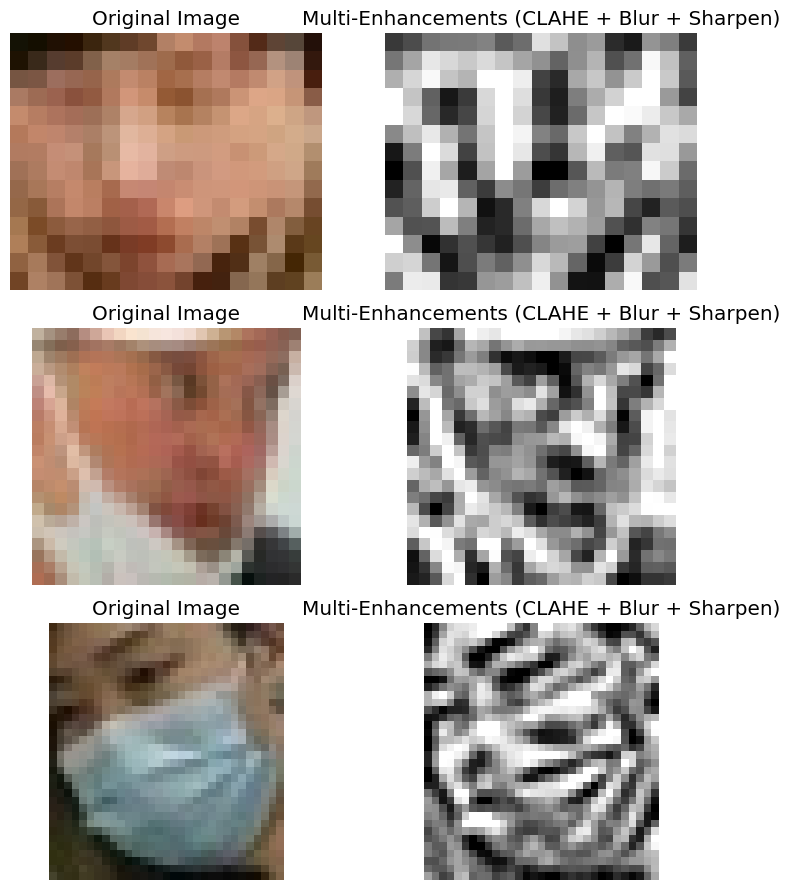

In [25]:
displayEnhancement(trainImagePath, applyMultiEnhancements, numSamples=3, functionName="Multi-Enhancements (CLAHE + Blur + Sharpen)")
